In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import pickle
import scipy.stats
import ast
import glob

In [2]:
dumas = pd.read_csv("resultados_dumas.csv", sep=";", index_col=0)

In [3]:
dumas

,FWIN,ADWIN
re,0.98,1.00
cf,0.95,0.98
lp,1.00,1.00
pl,0.98,1.00
cb,0.84,0.92
cm,0.91,1.00
cp,1.00,1.00
cd,1.00,0.88
pm,1.00,1.00
rp,0.96,0.96


In [ ]:
results = pd.read_csv("resultados_consolidados_2020-01-06.csv", sep=";", index_col = 0)

In [5]:
def insensitive_glob(pattern):
    def either(c):
        return '[%s%s]' % (c.lower(), c.upper()) if c.isalpha() else c
    return glob.glob(''.join(map(either, pattern)))

In [6]:
dr = insensitive_glob("../drift_detection_results_v4_sum_amplitude/*/*/*.csv")

In [16]:
tqdm.pandas()

In [15]:
from tqdm import tqdm_notebook

In [18]:
bases = []

for i in range(len(dr)):
    f = dr[i]
    print((i, len(dr)), end="\r")
    bases.append(
        pd.read_csv(f, index_col=0, sep=";")
    )

In [19]:
results = pd.concat(bases)

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [20]:
results.to_csv("resultados_consolidados_2020-01-18_v4_sum_amplitude.csv", sep=";")

In [21]:
results.detection_type.value_counts()

cumulative     2177280
exponential    2177280
tradicional     725760
Name: detection_type, dtype: int64

In [23]:
del bases

In [24]:
# import gc
gc.collect()

0

In [ ]:
# results = pd.concat([
#     pd.read_excel("NOVO_resultados_agregados_sliding=False_agglomerative.xlsx", index_col=0),
#     pd.read_excel("NOVO_resultados_agregados_sliding=False.xlsx", index_col=0),
#     pd.read_excel("NOVO_resultados_agregados_sliding=True.xlsx", index_col=0),
#     pd.read_excel("NOVO_resultados_agregados_metricas_novas_representacoes_sliding=False.xlsx", index_col=0),
#     pd.read_excel("NOVO_resultados_agregados_metricas_novas_representacoes.xlsx", index_col=0),
#     pd.read_pickle("NOVO_resultados_agregados_exponential.pickle")
# ])

In [25]:
min_dumas = {}
for i, row in dumas.iterrows():
    min_dumas[i] = min(row["FWIN"], row["ADWIN"])

In [26]:
results["smooth_factor"] = results.smooth_factor.fillna(-1)

In [27]:
results = results.dropna()

In [88]:
# results["maior_igual_dumas"] = results.apply(
#     lambda x: 1 if x["F1"] >= min_dumas[x["tipo_mudanca"]] else 0,
#     axis=1
# )

In [89]:
len(results.tipo_mudanca.unique()) * 3

54

In [90]:
results.columns

Index(['tipo_mudanca', 'log_size', 'representation', 'window_size', 'model',
       'sliding_window', 'measure', 'detection_type', 'input',
       'rolling_window', 'smooth_factor', 'std_tolerance', 'Precision',
       'Recall', 'F1', 'Delay', 'Correct_Predictions', 'Support',
       'Drifts_Found', 'Resp'],
      dtype='object')

In [28]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
    if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                    df[col] = df[col].astype(np.uint16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                    df[col] = df[col].astype(np.uint32)                    
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                    df[col] = df[col].astype(np.uint64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [29]:
results = reduce_mem_usage(results)

Memory usage of dataframe is 780.04 MB
Memory usage after optimization is: 750.97 MB
Decreased by 3.7%


In [30]:
results.representation.value_counts()

transitions    1270080
tfidf          1270080
frequency      1270080
binary         1270080
Name: representation, dtype: int64

In [31]:
results.measure.value_counts()

amplitude_dist_between_centroids    2540160
sum_dist_between_centroids          2540160
Name: measure, dtype: int64

In [32]:
import gc
gc.collect()

0

In [33]:
grouped_means = results.groupby([
    "measure", "representation", "rolling_window", "sliding_window", "std_tolerance", "window_size", 
    "tipo_mudanca", "model", "detection_type", "smooth_factor"
]).agg({
    'F1': ['mean', "count"],
    'Delay': 'mean'
}).reset_index()

grouped_means.columns = [
    "measure", "representation", "rolling_window", "sliding_window", "std_tolerance", "window_size", 
    "tipo_mudanca", "model", "detection_type", "smooth_factor", "F1", "count", "mean_delay"
]

grouped_means = grouped_means.sort_values(['F1'], ascending=False)

In [34]:
grouped_means.drop_duplicates(["tipo_mudanca", "representation", "measure"]).to_csv("best_configuration_per_run_tipo_mudanca_and_representation_v4_sum_amplitude.csv", sep=";")

In [36]:
grouped_means_todos_tipos_mudanca = grouped_means.groupby([
    "measure", "representation", "rolling_window", "sliding_window", "std_tolerance", "window_size", 
    "model", "detection_type", "smooth_factor"
]).agg({'F1': 'mean', "count": "sum"}).reset_index()

grouped_means_todos_tipos_mudanca.columns = [
    "measure", "representation", "rolling_window", "sliding_window", "std_tolerance", "window_size", 
    "model", "detection_type", "smooth_factor", "F1", "count"
]

grouped_means_todos_tipos_mudanca = grouped_means_todos_tipos_mudanca.sort_values(['F1'], ascending=False)

In [44]:
best_runs = grouped_means_todos_tipos_mudanca.drop_duplicates(["measure", "representation"], keep="first")

In [39]:
best_runs = grouped_means_todos_tipos_mudanca.drop_duplicates(["measure"], keep="first")

In [45]:
best_runs

,measure,representation,rolling_window,sliding_window,std_tolerance,window_size,model,detection_type,smooth_factor,F1,count
83153,sum_dist_between_centroids,transitions,2,False,1.75,250,kmeans__k=8,cumulative,0.2,0.750172,54
59624,sum_dist_between_centroids,frequency,2,False,1.75,250,kmeans__k=3,exponential,0.9,0.741432,54
13172,amplitude_dist_between_centroids,frequency,2,False,2.25,250,kmeans__k=3,exponential,0.9,0.741323,54
35796,amplitude_dist_between_centroids,transitions,2,False,1.50,250,agglomerative__k=6_linkage=ward,exponential,0.9,0.734274,54
236,amplitude_dist_between_centroids,binary,2,False,1.25,250,kmeans__k=3,exponential,0.9,0.725674,54
47269,sum_dist_between_centroids,binary,2,False,1.25,250,agglomerative__k=8_linkage=ward,exponential,0.9,0.716032,54
70789,sum_dist_between_centroids,tfidf,2,False,1.25,250,agglomerative__k=8_linkage=ward,exponential,0.9,0.715040,54
23756,amplitude_dist_between_centroids,tfidf,2,False,1.25,250,kmeans__k=3,exponential,0.9,0.707826,54


In [48]:
def get_results_by_best_run(results, best_runs, i=0):
    return results[
        (results.measure == best_runs.iloc[i].measure) &
        (results.rolling_window == best_runs.iloc[i].rolling_window) &
        (results.sliding_window == best_runs.iloc[i].sliding_window) &
        (results.std_tolerance == best_runs.iloc[i].std_tolerance) &
        (results.window_size == best_runs.iloc[i].window_size) &
        (results.representation == best_runs.iloc[i].representation) &
        (results.smooth_factor == best_runs.iloc[i].smooth_factor) &
        (results.detection_type == best_runs.iloc[i].detection_type) &
        (results.model == best_runs.iloc[i].model)
    ]

In [61]:
results.groupby(["window_size", "log_size"]).F1.mean()

window_size  log_size
50           5000        0.264285
             7500        0.219172
             10000       0.166400
75           5000        0.192333
             7500        0.217947
             10000       0.131293
100          5000        0.344683
             7500        0.193917
             10000       0.205566
150          5000        0.320310
             7500        0.338767
             10000       0.205571
200          5000        0.382446
             7500        0.264233
             10000       0.355155
250          5000        0.437257
             7500        0.403466
             10000       0.369670
300          5000        0.444197
             7500        0.343021
             10000       0.304911
Name: F1, dtype: float64

In [114]:
# best_runs = best_runs.drop_duplicates(["measure", "representation"], keep="first")

In [50]:
get_results_by_best_run(results, best_runs, 0).groupby("tipo_mudanca").F1.agg(["max", "mean", "count"])

,max,mean,count
tipo_mudanca,,,
IOR,1.000000,0.865320,3
IRO,1.000000,0.797980,3
OIR,1.000000,0.835017,3
ORI,1.000000,0.851675,3
RIO,0.941176,0.790918,3
ROI,1.000000,0.892593,3
cb,1.000000,0.835017,3
cd,0.818182,0.798653,3
cf,1.000000,0.832916,3


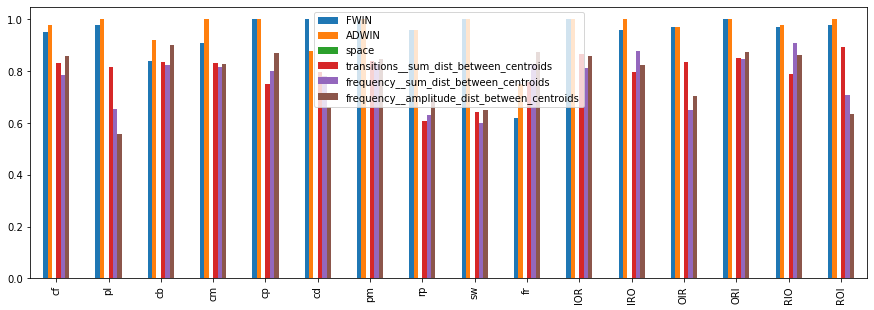

In [51]:
dumas = dumas[["FWIN", "ADWIN"]].copy()

dumas["space"] = [0 for x in dumas.index]

test = get_results_by_best_run(results, best_runs, 0).groupby("tipo_mudanca").F1.mean()
dumas[
    best_runs.iloc[0].representation + "__" + best_runs.iloc[0].measure
] = test.loc[dumas.index]

test = get_results_by_best_run(results, best_runs, 1).groupby("tipo_mudanca").F1.mean()
dumas[
    best_runs.iloc[1].representation + "__" + best_runs.iloc[1].measure
] = test.loc[dumas.index]

test = get_results_by_best_run(results, best_runs, 2).groupby("tipo_mudanca").F1.mean()
dumas[
    best_runs.iloc[2].representation + "__" + best_runs.iloc[2].measure
] = test.loc[dumas.index]

dumas.loc[[x for x in dumas.index if x not in ["re", "lp"]]].plot(kind='bar', figsize=(15, 5))

In [52]:
best_runs.head()

,measure,representation,rolling_window,sliding_window,std_tolerance,window_size,model,detection_type,smooth_factor,F1,count
83153,sum_dist_between_centroids,transitions,2,False,1.75,250,kmeans__k=8,cumulative,0.2,0.750172,54
59624,sum_dist_between_centroids,frequency,2,False,1.75,250,kmeans__k=3,exponential,0.9,0.741432,54
13172,amplitude_dist_between_centroids,frequency,2,False,2.25,250,kmeans__k=3,exponential,0.9,0.741323,54
35796,amplitude_dist_between_centroids,transitions,2,False,1.50,250,agglomerative__k=6_linkage=ward,exponential,0.9,0.734274,54
236,amplitude_dist_between_centroids,binary,2,False,1.25,250,kmeans__k=3,exponential,0.9,0.725674,54


In [61]:
dumas = dumas[["FWIN", "ADWIN"]].copy()

test = get_results_by_best_run(results, best_runs[best_runs.measure == "diff_centroids"], 0).groupby("tipo_mudanca").F1.max()
dumas["diff_centroids"] = test.loc[dumas.index]

test = get_results_by_best_run(results, best_runs[best_runs.measure == "avg_dist_between_centroids"], 0).groupby("tipo_mudanca").F1.max()
dumas["avg_dist_between_centroids"] = test.loc[dumas.index]

test = get_results_by_best_run(results, best_runs[best_runs.measure == "dist_intra_cluster"], 0).groupby("tipo_mudanca").F1.max()
dumas["dist_intra_cluster"] = test.loc[dumas.index]

dumas.plot(kind='bar', figsize=(15, 5))

IndexError: single positional indexer is out-of-bounds

In [99]:
import gc
gc.collect()

0